In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-62.33783722058597, -24.345153931713043),
 (43.487948173225305, -115.82531732860743),
 (-69.38568612552984, -30.313917877862224),
 (7.778039459787479, -64.36185709674676),
 (-50.59371533719519, -100.05979235750492),
 (-59.66012135102932, -122.29880268486397),
 (70.85816653417095, 56.815089982501945),
 (-17.070057277779412, -174.50794954255736),
 (-31.416448061318988, -152.07783042440596),
 (71.87489913564661, -134.64913855758812),
 (-54.687865169789085, -177.31157707136072),
 (8.418297324762221, -13.084054835356682),
 (26.649296626890887, -101.70560607963925),
 (-6.6394723150681045, -115.3206043328174),
 (1.416328801060402, 140.30503121654942),
 (-8.871663324997655, 159.1427245304132),
 (87.63113573470295, 165.233153127683),
 (19.389161572941504, -1.903405364050002),
 (-20.128829799260217, -167.68517200490857),
 (57.373975436725175, 19.38943465044656),
 (11.011498727473878, -90.37219848470187),
 (-32.18675663246235, -118.35395265448986),
 (-55.511150272469706, 129.35616078506496),
 (

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Orint the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set number and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data. 
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
            
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loasing is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | mountain home
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | ciudad bolivar
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | hihifo
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | hastings
Processing Record 13 of Set 1 | castanos
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | vanimo
Processing Record 16 of Set 1 | buala
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | araouane
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | visby
Processing Record 21 of Set 1 | acajutla
Processing Record 22 of Set 1 | mount gambier
Processing Record 23 of Set 1 | cherskiy
Processing Recor

Processing Record 42 of Set 4 | durban
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | ribeira grande
Processing Record 46 of Set 4 | kemi
Processing Record 47 of Set 4 | quatre cocos
Processing Record 48 of Set 4 | havelock
Processing Record 49 of Set 4 | jumla
Processing Record 50 of Set 4 | baruun-urt
Processing Record 1 of Set 5 | lata
Processing Record 2 of Set 5 | avarua
Processing Record 3 of Set 5 | north atlanta
Processing Record 4 of Set 5 | port hedland
Processing Record 5 of Set 5 | peddapuram
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | sao felix do xingu
Processing Record 8 of Set 5 | sao joao da barra
Processing Record 9 of Set 5 | onega
Processing Record 10 of Set 5 | kalmunai
Processing Record 11 of Set 5 | batangafo
Processing Record 12 of Set 5 | dudinka
Processing Record 13 of Set 5 | gizo
Processing Record 14 of Set 5 | pedernales
Processing Record 15 of Set 5 | chama
Proces

Processing Record 31 of Set 8 | hudiksvall
Processing Record 32 of Set 8 | peniche
Processing Record 33 of Set 8 | mazagao
Processing Record 34 of Set 8 | gat
Processing Record 35 of Set 8 | pala
Processing Record 36 of Set 8 | cuamba
Processing Record 37 of Set 8 | krasnogvardeyskoye
Processing Record 38 of Set 8 | egvekinot
Processing Record 39 of Set 8 | saint-ambroise
Processing Record 40 of Set 8 | bozeman
Processing Record 41 of Set 8 | omsukchan
Processing Record 42 of Set 8 | tarbert
Processing Record 43 of Set 8 | alugan
Processing Record 44 of Set 8 | bolshoye sorokino
City not found. Skipping...
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | kavieng
Processing Record 47 of Set 8 | rossland
Processing Record 48 of Set 8 | faya
Processing Record 49 of Set 8 | chifeng
Processing Record 50 of Set 8 | paamiut
Processing Record 1 of Set 9 | kemijarvi
Processing Record 2 of Set 9 | ahipara
Processing Record 3 of Set 9 | douglas
Processing Record 4 of Set 9 |

Processing Record 20 of Set 12 | nadym
Processing Record 21 of Set 12 | beirut
Processing Record 22 of Set 12 | kozienice
Processing Record 23 of Set 12 | saint-leu
Processing Record 24 of Set 12 | padang
Processing Record 25 of Set 12 | geylegphug
City not found. Skipping...
Processing Record 26 of Set 12 | beloha
Processing Record 27 of Set 12 | margate
Processing Record 28 of Set 12 | bandarbeyla
Processing Record 29 of Set 12 | saleaula
City not found. Skipping...
Processing Record 30 of Set 12 | kiomboi
Processing Record 31 of Set 12 | torit
Processing Record 32 of Set 12 | manggar
Processing Record 33 of Set 12 | strezhevoy
Processing Record 34 of Set 12 | samarai
Processing Record 35 of Set 12 | batesville
Processing Record 36 of Set 12 | aitape
Processing Record 37 of Set 12 | semey
Processing Record 38 of Set 12 | bakel
Processing Record 39 of Set 12 | salekhard
Processing Record 40 of Set 12 | lillehammer
Processing Record 41 of Set 12 | te horo
Processing Record 42 of Set 12

In [10]:
count = len(city_data)
count

582

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,56.79,71,0,6.64,UY,2022-04-06 01:16:18
1,Mountain Home,43.1330,-115.6912,45.88,93,20,16.11,US,2022-04-06 01:16:18
2,Ushuaia,-54.8000,-68.3000,37.06,87,40,27.63,AR,2022-04-06 01:15:36
3,Ciudad Bolivar,8.1222,-63.5497,84.25,58,98,15.21,VE,2022-04-06 01:16:19
4,Castro,-24.7911,-50.0119,63.52,97,72,5.03,BR,2022-04-06 01:16:19
5,Rikitea,-23.1203,-134.9692,79.18,66,87,16.69,PF,2022-04-06 01:16:20
6,Mataura,-46.1927,168.8643,50.31,78,99,12.73,NZ,2022-04-06 01:16:21
7,Tuktoyaktuk,69.4541,-133.0374,-5.80,71,20,9.22,CA,2022-04-06 01:16:22
8,Vaini,-21.2000,-175.2000,80.76,89,40,4.61,TO,2022-04-06 01:16:22
9,Hastings,50.8552,0.5729,50.99,65,100,21.09,GB,2022-04-06 01:16:23


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-04-06 01:16:18,-33.6971,-53.4616,56.79,71,0,6.64
1,Mountain Home,US,2022-04-06 01:16:18,43.1330,-115.6912,45.88,93,20,16.11
2,Ushuaia,AR,2022-04-06 01:15:36,-54.8000,-68.3000,37.06,87,40,27.63
3,Ciudad Bolivar,VE,2022-04-06 01:16:19,8.1222,-63.5497,84.25,58,98,15.21
4,Castro,BR,2022-04-06 01:16:19,-24.7911,-50.0119,63.52,97,72,5.03
5,Rikitea,PF,2022-04-06 01:16:20,-23.1203,-134.9692,79.18,66,87,16.69
6,Mataura,NZ,2022-04-06 01:16:21,-46.1927,168.8643,50.31,78,99,12.73
7,Tuktoyaktuk,CA,2022-04-06 01:16:22,69.4541,-133.0374,-5.80,71,20,9.22
8,Vaini,TO,2022-04-06 01:16:22,-21.2000,-175.2000,80.76,89,40,4.61
9,Hastings,GB,2022-04-06 01:16:23,50.8552,0.5729,50.99,65,100,21.09


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant feilds from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

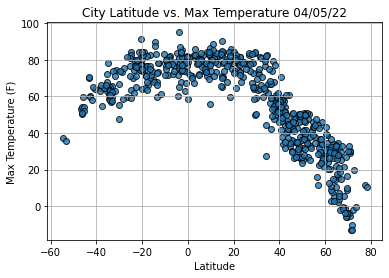

In [15]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

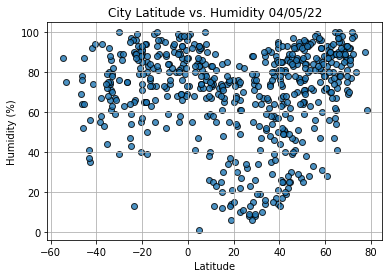

In [16]:
# Import the time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

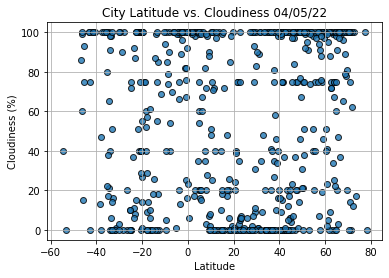

In [17]:
# Import the time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

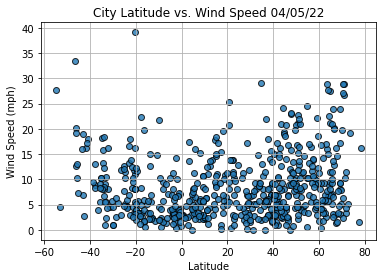

In [18]:
# Import the time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [52]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show

In [53]:
index13 = city_data_df.loc[13]
index13

City                        Buala
Country                        SB
Date          2022-04-06 01:16:25
Lat                        -8.145
Lng                      159.5921
Max Temp                    80.37
Humidity                       84
Cloudiness                    100
Wind Speed                   9.46
Name: 13, dtype: object

In [54]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
577    False
578    False
579     True
580     True
581    False
Name: Lat, Length: 582, dtype: bool

In [55]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Mountain Home,US,2022-04-06 01:16:18,43.1330,-115.6912,45.88,93,20,16.11
3,Ciudad Bolivar,VE,2022-04-06 01:16:19,8.1222,-63.5497,84.25,58,98,15.21
7,Tuktoyaktuk,CA,2022-04-06 01:16:22,69.4541,-133.0374,-5.80,71,20,9.22
9,Hastings,GB,2022-04-06 01:16:23,50.8552,0.5729,50.99,65,100,21.09
10,Castanos,MX,2022-04-06 01:16:24,26.7833,-101.4167,82.94,8,0,11.16
...,...,...,...,...,...,...,...,...,...
573,Port Hueneme,US,2022-04-06 01:32:59,34.1478,-119.1951,82.27,59,0,9.22
574,Helong,CN,2022-04-06 01:32:59,42.5397,128.9972,35.24,20,1,14.43
576,Sandakan,MY,2022-04-06 01:29:20,5.8402,118.1179,83.88,74,20,4.61
579,Verkhoshizhemye,RU,2022-04-06 01:33:03,58.0110,49.1038,23.85,92,98,8.46


In [56]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Mountain Home,US,2022-04-06 01:16:18,43.1330,-115.6912,45.88,93,20,16.11
3,Ciudad Bolivar,VE,2022-04-06 01:16:19,8.1222,-63.5497,84.25,58,98,15.21
7,Tuktoyaktuk,CA,2022-04-06 01:16:22,69.4541,-133.0374,-5.80,71,20,9.22
9,Hastings,GB,2022-04-06 01:16:23,50.8552,0.5729,50.99,65,100,21.09
10,Castanos,MX,2022-04-06 01:16:24,26.7833,-101.4167,82.94,8,0,11.16


In [57]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

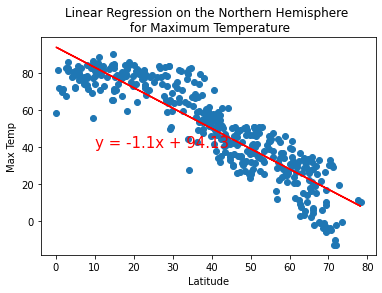

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

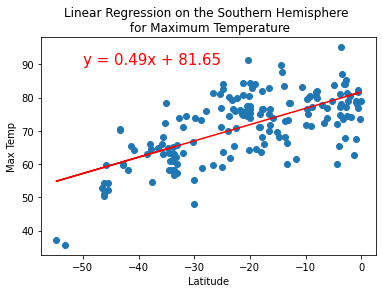

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

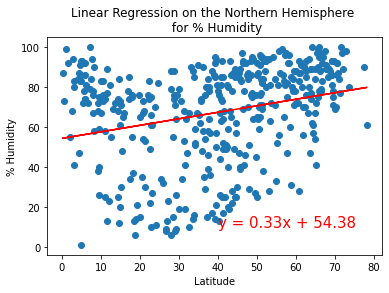

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity",(40,10))

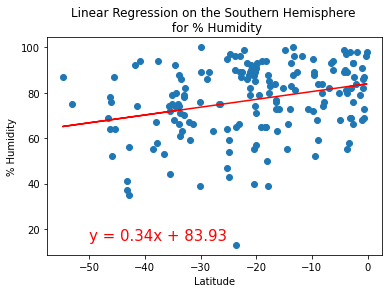

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity",(-50,15))

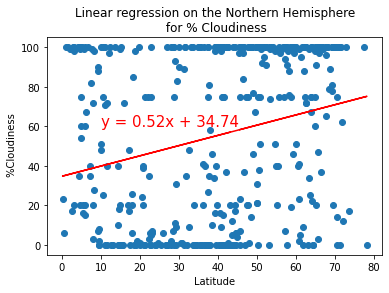

In [74]:
# Linearregression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear regression on the Northern Hemisphere\n for % Cloudiness", " %Cloudiness", (10,60))

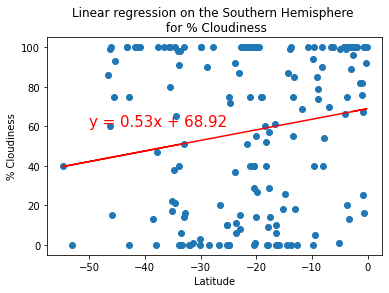

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-50,60))

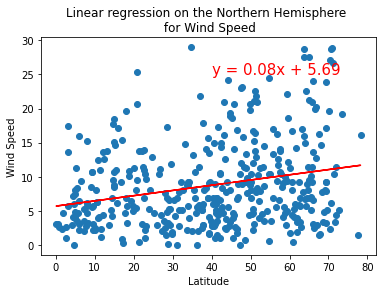

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed",(40,25))

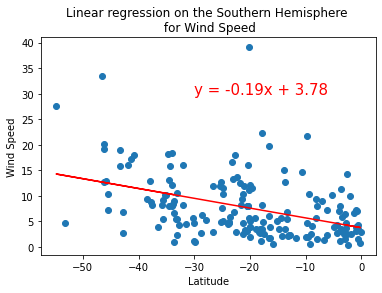

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed",(-30,30))